# Model Evaluation & Insights

In this notebook, we evaluate the ML models trained in Notebook 3. 
We aim to understand:
- how well each model predicts match outcomes
- which features contribute most to predictions
- differences between linear and nonlinear models

We’ll visualize performance metrics, feature importance, and draw actionable insights. 


In [1]:
import pandas as pd
import numpy as np
import joblib
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# loads test set
x_test = pd.read_csv('../data/processed/x_test.csv')
y_test = pd.read_csv('../data/processed/y_test.csv')

# loads trained models 
logreg_model = joblib.load('../models/logistic_regression.pkl')
rf_model = joblib.load('../models/random_forest.pkl')

In [12]:
# generates predictions
y_pred_logreg = logreg_model.predict(x_test)
y_pred_rf = rf_model.predict(x_test)

# probabilities for ROC (Receiver Operating Characteristic) curves - confidence of the model
y_prob_logreg = logreg_model.predict_proba(x_test)[:,1]
y_prob_rf = rf_model.predict_proba(x_test)[:,1]

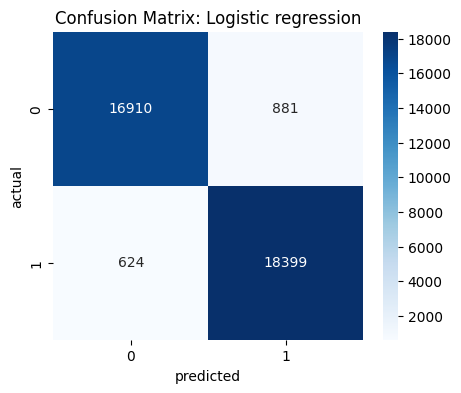

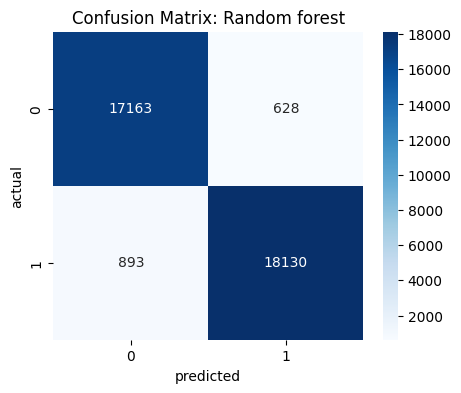

In [13]:
# confusion matrices
def plot_confusion(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix: {model_name}')
    plt.xlabel('predicted')
    plt.ylabel('actual')
    plt.show()

plot_confusion(y_test, y_pred_logreg, 'Logistic regression')
plot_confusion(y_test, y_pred_rf, 'Random forest')

- confusion matrix shows true positives/negatives
- compares logistic regression (linear) vs random forest (nonlinear) - we can see RF struggles with false negatives more, whereas LR struggles with false positives


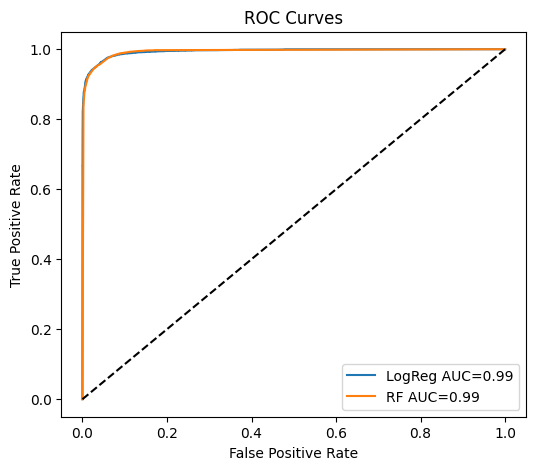